# Analyse tracking events 
Notebook to investigate the events in the tracking data 

In [6]:
import sys
import os
import polars as pl
import pandas as pd
import itables

current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, "../../", 'src'))

from config import Constants
from preprocessing.preprocessing import BigDataBowlData
from plotting.plotting import PlotPlayVertical
import seaborn as sns

# init_notebook_mode(all_interactive=True)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(100)


GAMES_FILE = "../../data/games.csv"
PLAYS_FILE = "../../data/plays.csv"
PLAYERS_FILE = "../../data/players.csv"
PLAYER_PLAYS_FILE = "../../data/player_play.csv"

TRACKING_FILES = ["../../data/tracking_week_1.csv",
                  "../../data/tracking_week_2.csv"
                  ]

In [7]:
data = BigDataBowlData(GAMES_FILE, 
                       PLAYS_FILE, 
                       PLAYERS_FILE, 
                       PLAYER_PLAYS_FILE, 
                       TRACKING_FILES)

In [8]:
tracking_data = data.tracking_data.collect()
tracking_data.head()

shape: (5, 18)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ gam ┆ pla ┆ nfl ┆ dis ┆ fra ┆ fra ┆ tim ┆ jer ┆ clu ┆ pla ┆ x   ┆ y   ┆ s   ┆ a   ┆ dis ┆ o   ┆ dir ┆ eve │
│ eId ┆ yId ┆ Id  ┆ pla ┆ meI ┆ meT ┆ e   ┆ sey ┆ b   ┆ yDi ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ nt  │
│ --- ┆ --- ┆ --- ┆ yNa ┆ d   ┆ ype ┆ --- ┆ Num ┆ --- ┆ rec ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ --- │
│ i64 ┆ i64 ┆ i64 ┆ me  ┆ --- ┆ --- ┆ str ┆ ber ┆ str ┆ tio ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str │
│     ┆     ┆     ┆ --- ┆ i64 ┆ str ┆     ┆ --- ┆     ┆ n   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ str ┆     ┆     ┆     ┆ i64 ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 1   ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 28. ┆ 0.7 ┆ 0.3 ┆ 0.0 ┆ 246 ┆ 68. ┆ hud │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 06  ┆ 55  ┆ 2   ┆ 7   ┆ 7   ┆ .17 ┆ 34  ┆ dle │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ _br │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ eak │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ _of │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ fen │
│     ┆     ┆     ┆     ┆     ┆     ┆ 03. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ se  │
│     ┆     ┆     ┆     ┆     ┆     ┆ 5   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 2   ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 28. ┆ 0.7 ┆ 0.3 ┆ 0.0 ┆ 245 ┆ 71. ┆ NA  │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 13  ┆ 57  ┆ 1   ┆ 6   ┆ 7   ┆ .41 ┆ 21  ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 03. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 6   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 3   ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 28. ┆ 0.6 ┆ 0.2 ┆ 0.0 ┆ 244 ┆ 69. ┆ NA  │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 2   ┆ 59  ┆ 9   ┆ 3   ┆ 7   ┆ .45 ┆ 9   ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 03. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 7   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 4   ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 28. ┆ 0.6 ┆ 0.2 ┆ 0.0 ┆ 244 ┆ 67. ┆ NA  │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 26  ┆ 62  ┆ 7   ┆ 2   ┆ 7   ┆ .45 ┆ 98  ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆

In [5]:
data.raw_player_plays.collect().head()

shape: (5, 50)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ gam ┆ pla ┆ nfl ┆ tea ┆ had ┆ rus ┆ had ┆ pas ┆ sac ┆ had ┆ rec ┆ was ┆ yar ┆ fum ┆ fum ┆ fum ┆ ass ┆ for ┆ hal ┆ pas ┆ qua ┆ sac ┆ saf ┆ sol ┆ tac ┆ tac ┆ tac ┆ had ┆ int ┆ fum ┆ fum ┆ pen ┆ pen ┆ was ┆ cau ┆ tim ┆ get ┆ inM ┆ shi ┆ mot ┆ was ┆ rou ┆ blo ┆ blo ┆ blo ┆ pre ┆ tim ┆ pff ┆ pff ┆ pff │
│ eId ┆ yId ┆ Id  ┆ mAb ┆ Rus ┆ hin ┆ Dro ┆ sin ┆ kYa ┆ Pas ┆ eiv ┆ Tar ┆ dag ┆ ble ┆ ble ┆ ble ┆ ist ┆ ced ┆ fSa ┆ sDe ┆ rte ┆ kYa ┆ ety ┆ oTa ┆ kle ┆ kle ┆ kle ┆ Int ┆ erc ┆ ble ┆ ble ┆ alt ┆ alt ┆ Ini ┆ sed ┆ eTo ┆ Off ┆ oti ┆ ftS ┆ ion ┆ Run ┆ teR ┆ cke ┆ cke ┆ cke ┆ ssu ┆ eTo ┆ _de ┆ _pr ┆ _se │
│ --- ┆ --- ┆ --- ┆ br  ┆ hAt ┆ gYa ┆ pba ┆ gYa ┆ rds ┆ sRe ┆ ing ┆ get ┆ eGa ┆ s   ┆ Los ┆ Out ┆ edT ┆ Fum ┆ ckY ┆ fen ┆ rba ┆ rds ┆ AsD ┆ ckl ┆ Ass ┆ For ┆ For ┆ erc ┆ ept ┆ Rec ┆ Rec ┆ yYa ┆ yNa ┆ tia ┆ Pre ┆ Pre ┆ Tim ┆ onA ┆ inc ┆ Sin ┆ nin ┆ an  ┆ dPl ┆ dPl ┆ dPl ┆ reA ┆ Pre ┆ fen ┆ ima ┆ con │
│ i64 ┆ i64 ┆ i64 ┆ --- ┆ tem ┆ rds ┆ ck  ┆ rds ┆ AsO ┆ cep ┆ Yar ┆ ted ┆ ine ┆ --- ┆ t   ┆ OfB ┆ ack ┆ ble ┆ ard ┆ sed ┆ ckH ┆ AsD ┆ efe ┆ e   ┆ ist ┆ ALo ┆ ALo ┆ ept ┆ ion ┆ ove ┆ ove ┆ rds ┆ mes ┆ lPa ┆ ssu ┆ ssu ┆ eAs ┆ tBa ┆ eLi ┆ ceL ┆ gRo ┆ --- ┆ aye ┆ aye ┆ aye ┆ llo ┆ ssu ┆ siv ┆ ryD ┆ dar │
│     ┆     ┆     ┆ str ┆ pt  ┆ --- ┆ --- ┆ --- ┆ ffe ┆ tio ┆ ds  ┆ Rec ┆ dAf ┆ i64 ┆ --- ┆ oun ┆ le  ┆ AsD ┆ sAs ┆ --- ┆ it  ┆ efe ┆ nse ┆ --- ┆ --- ┆ ss  ┆ ssY ┆ ion ┆ Yar ┆ rie ┆ ryY ┆ --- ┆ --- ┆ ssR ┆ re  ┆ reA ┆ Pas ┆ llS ┆ nes ┆ ine ┆ ute ┆ str ┆ rNF ┆ rNF ┆ rNF ┆ wed ┆ reA ┆ eCo ┆ efe ┆ yDe │
│     ┆     ┆     ┆     ┆ --- ┆ i64 ┆ i64 ┆ i64 ┆ nse ┆ n   ┆ --- ┆ eiv ┆ ter ┆     ┆ i64 ┆ ds  ┆ --- ┆ efe ┆ Def ┆ i64 ┆ --- ┆ nse ┆ --- ┆ i64 ┆ i64 ┆ --- ┆ ard ┆ --- ┆ ds  ┆ s   ┆ ard ┆ i64 ┆ str ┆ ush ┆ --- ┆ sPa ┆ sRu ┆ nap ┆ et  ┆ set ┆ --- ┆     ┆ LId ┆ LId ┆ LId ┆ AsB ┆ llo ┆ ver ┆ nsi ┆ fen │
│     ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆ --- ┆ --- ┆ i64 ┆ er  ┆ The ┆     ┆     ┆ --- ┆ i64 ┆ nse ┆ ens ┆     ┆ i64 ┆ --- ┆ i64 ┆     ┆     ┆ i64 ┆ age ┆ i64 ┆ --- ┆ --- ┆ s   ┆     ┆     ┆ er  ┆ boo ┆ ssR ┆ she ┆ --- ┆ --- ┆ --- ┆ str ┆     ┆ 1   ┆ 2   ┆ 3   ┆ loc ┆ wed ┆ age ┆ veC ┆ siv │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 ┆ i64 ┆     ┆ --- ┆ Cat ┆     ┆     ┆ i64 ┆     ┆ --- ┆ e   ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆     ┆ --- ┆     ┆ i64 ┆ i64 ┆ --- ┆     ┆     ┆ --- ┆ l   ┆ ush ┆ r   ┆ str ┆ str ┆ str ┆     ┆     ┆ --- ┆ --- ┆ --- ┆ ker ┆ AsB ┆ Ass ┆ ove ┆ eCo │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 ┆ ch  ┆     ┆     ┆     ┆     ┆ i64 ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆ str ┆     ┆ er  ┆ --- ┆     ┆     ┆     ┆     ┆     ┆ str ┆ str ┆ str ┆ --- ┆ loc ┆ ign ┆ rag ┆ ver │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ ker ┆ men ┆ eMa ┆ age │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆ …   ┆ …   ┆ …   │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ --- ┆ --- ┆ --- │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆    

In [6]:
# All tracking ecents 
tracking_data["event"].value_counts().sort(by="count", descending=True)

shape: (38, 2)
┌───────────────────────────┬──────────┐
│ event                     ┆ count    │
│ ---                       ┆ ---      │
│ str                       ┆ u32      │
╞═══════════════════════════╪══════════╡
│ NA                        ┆ 13213845 │
│ ball_snap                 ┆ 86319    │
│ line_set                  ┆ 85652    │
│ huddle_break_offense      ┆ 66907    │
│ first_contact             ┆ 55614    │
│ tackle                    ┆ 53728    │
│ pass_forward              ┆ 47886    │
│ pass_arrived              ┆ 37329    │
│ handoff                   ┆ 29946    │
│ pass_outcome_caught       ┆ 29325    │
│ man_in_motion             ┆ 29210    │
│ pass_outcome_incomplete   ┆ 15801    │
│ play_action               ┆ 15180    │
│ shift                     ┆ 11592    │
│ out_of_bounds             ┆ 9246     │
│ run                       ┆ 4646     │
│ qb_sack                   ┆ 2760     │
│ touchdown                 ┆ 2024     │
│ dropped_pass              ┆ 1702     │
│ fumble                    ┆ 1564     │
│ pass_tipped               ┆ 1219     │
│ pass_outcome_touchdown    ┆ 1173     │
│ pass_outcome_interception ┆ 1104     │
│ fumble_offense_recovered  ┆ 897      │
│ qb_kneel                  ┆ 851      │
│ play_submit               ┆ 805      │
│ fumble_defense_recovered  ┆ 667      │
│ qb_slide                  ┆ 552      │
│ qb_strip_sack             ┆ 391      │
│ lateral                   ┆ 253      │
│ qb_spike                  ┆ 207      │
│ pass_shovel               ┆ 184      │
│ snap_direct               ┆ 184      │
│ touchback                 ┆ 115      │
│ huddle_start_offense      ┆ 92       │
│ safety                    ┆ 23       │
│ timeout_away              ┆ 23       │
│ run_pass_option           ┆ 23       │
└───────────────────────────┴──────────┘

In [7]:
# How many unique plays? 
tracking_data["playId"].n_unique()

2514

## Examine individual play

In [8]:
sample_play = data.get_play_data(2022091200, 64)

In [9]:
vertical_play = PlotPlayVertical(sample_play["tracking_df"])

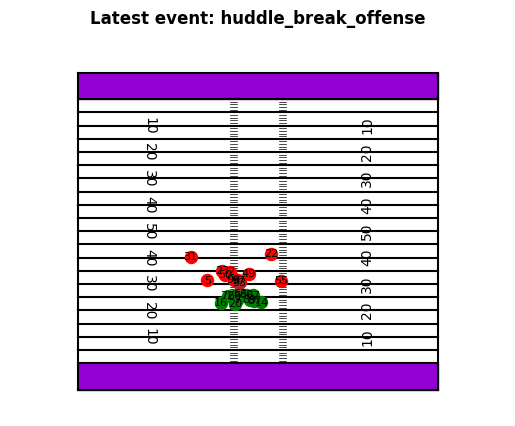

In [10]:
vertical_play.plot_frame(5)

In [11]:
vertical_play.animate_play()

In [12]:
sample_play_tracking = tracking_data.filter(pl.col("gameId") == 2022091200).filter(pl.col("playId") == 64)
sample_play_tracking.head()

shape: (5, 18)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ gam ┆ pla ┆ nfl ┆ dis ┆ fra ┆ fra ┆ tim ┆ jer ┆ clu ┆ pla ┆ x   ┆ y   ┆ s   ┆ a   ┆ dis ┆ o   ┆ dir ┆ eve │
│ eId ┆ yId ┆ Id  ┆ pla ┆ meI ┆ meT ┆ e   ┆ sey ┆ b   ┆ yDi ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ nt  │
│ --- ┆ --- ┆ --- ┆ yNa ┆ d   ┆ ype ┆ --- ┆ Num ┆ --- ┆ rec ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ --- │
│ i64 ┆ i64 ┆ i64 ┆ me  ┆ --- ┆ --- ┆ str ┆ ber ┆ str ┆ tio ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str │
│     ┆     ┆     ┆ --- ┆ i64 ┆ str ┆     ┆ --- ┆     ┆ n   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ str ┆     ┆     ┆     ┆ i64 ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 1   ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 28. ┆ 0.7 ┆ 0.3 ┆ 0.0 ┆ 246 ┆ 68. ┆ hud │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 06  ┆ 55  ┆ 2   ┆ 7   ┆ 7   ┆ .17 ┆ 34  ┆ dle │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ _br │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ eak │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ _of │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ fen │
│     ┆     ┆     ┆     ┆     ┆     ┆ 03. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ se  │
│     ┆     ┆     ┆     ┆     ┆     ┆ 5   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 2   ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 28. ┆ 0.7 ┆ 0.3 ┆ 0.0 ┆ 245 ┆ 71. ┆ NA  │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 13  ┆ 57  ┆ 1   ┆ 6   ┆ 7   ┆ .41 ┆ 21  ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 03. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 6   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 3   ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 28. ┆ 0.6 ┆ 0.2 ┆ 0.0 ┆ 244 ┆ 69. ┆ NA  │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 2   ┆ 59  ┆ 9   ┆ 3   ┆ 7   ┆ .45 ┆ 9   ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 03. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 7   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 4   ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 28. ┆ 0.6 ┆ 0.2 ┆ 0.0 ┆ 244 ┆ 67. ┆ NA  │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 26  ┆ 62  ┆ 7   ┆ 2   ┆ 7   ┆ .45 ┆ 98  ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆

In [13]:
data.raw_player_plays.collect().head()

shape: (5, 50)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ gam ┆ pla ┆ nfl ┆ tea ┆ had ┆ rus ┆ had ┆ pas ┆ sac ┆ had ┆ rec ┆ was ┆ yar ┆ fum ┆ fum ┆ fum ┆ ass ┆ for ┆ hal ┆ pas ┆ qua ┆ sac ┆ saf ┆ sol ┆ tac ┆ tac ┆ tac ┆ had ┆ int ┆ fum ┆ fum ┆ pen ┆ pen ┆ was ┆ cau ┆ tim ┆ get ┆ inM ┆ shi ┆ mot ┆ was ┆ rou ┆ blo ┆ blo ┆ blo ┆ pre ┆ tim ┆ pff ┆ pff ┆ pff │
│ eId ┆ yId ┆ Id  ┆ mAb ┆ Rus ┆ hin ┆ Dro ┆ sin ┆ kYa ┆ Pas ┆ eiv ┆ Tar ┆ dag ┆ ble ┆ ble ┆ ble ┆ ist ┆ ced ┆ fSa ┆ sDe ┆ rte ┆ kYa ┆ ety ┆ oTa ┆ kle ┆ kle ┆ kle ┆ Int ┆ erc ┆ ble ┆ ble ┆ alt ┆ alt ┆ Ini ┆ sed ┆ eTo ┆ Off ┆ oti ┆ ftS ┆ ion ┆ Run ┆ teR ┆ cke ┆ cke ┆ cke ┆ ssu ┆ eTo ┆ _de ┆ _pr ┆ _se │
│ --- ┆ --- ┆ --- ┆ br  ┆ hAt ┆ gYa ┆ pba ┆ gYa ┆ rds ┆ sRe ┆ ing ┆ get ┆ eGa ┆ s   ┆ Los ┆ Out ┆ edT ┆ Fum ┆ ckY ┆ fen ┆ rba ┆ rds ┆ AsD ┆ ckl ┆ Ass ┆ For ┆ For ┆ erc ┆ ept ┆ Rec ┆ Rec ┆ yYa ┆ yNa ┆ tia ┆ Pre ┆ Pre ┆ Tim ┆ onA ┆ inc ┆ Sin ┆ nin ┆ an  ┆ dPl ┆ dPl ┆ dPl ┆ reA ┆ Pre ┆ fen ┆ ima ┆ con │
│ i64 ┆ i64 ┆ i64 ┆ --- ┆ tem ┆ rds ┆ ck  ┆ rds ┆ AsO ┆ cep ┆ Yar ┆ ted ┆ ine ┆ --- ┆ t   ┆ OfB ┆ ack ┆ ble ┆ ard ┆ sed ┆ ckH ┆ AsD ┆ efe ┆ e   ┆ ist ┆ ALo ┆ ALo ┆ ept ┆ ion ┆ ove ┆ ove ┆ rds ┆ mes ┆ lPa ┆ ssu ┆ ssu ┆ eAs ┆ tBa ┆ eLi ┆ ceL ┆ gRo ┆ --- ┆ aye ┆ aye ┆ aye ┆ llo ┆ ssu ┆ siv ┆ ryD ┆ dar │
│     ┆     ┆     ┆ str ┆ pt  ┆ --- ┆ --- ┆ --- ┆ ffe ┆ tio ┆ ds  ┆ Rec ┆ dAf ┆ i64 ┆ --- ┆ oun ┆ le  ┆ AsD ┆ sAs ┆ --- ┆ it  ┆ efe ┆ nse ┆ --- ┆ --- ┆ ss  ┆ ssY ┆ ion ┆ Yar ┆ rie ┆ ryY ┆ --- ┆ --- ┆ ssR ┆ re  ┆ reA ┆ Pas ┆ llS ┆ nes ┆ ine ┆ ute ┆ str ┆ rNF ┆ rNF ┆ rNF ┆ wed ┆ reA ┆ eCo ┆ efe ┆ yDe │
│     ┆     ┆     ┆     ┆ --- ┆ i64 ┆ i64 ┆ i64 ┆ nse ┆ n   ┆ --- ┆ eiv ┆ ter ┆     ┆ i64 ┆ ds  ┆ --- ┆ efe ┆ Def ┆ i64 ┆ --- ┆ nse ┆ --- ┆ i64 ┆ i64 ┆ --- ┆ ard ┆ --- ┆ ds  ┆ s   ┆ ard ┆ i64 ┆ str ┆ ush ┆ --- ┆ sPa ┆ sRu ┆ nap ┆ et  ┆ set ┆ --- ┆     ┆ LId ┆ LId ┆ LId ┆ AsB ┆ llo ┆ ver ┆ nsi ┆ fen │
│     ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆ --- ┆ --- ┆ i64 ┆ er  ┆ The ┆     ┆     ┆ --- ┆ i64 ┆ nse ┆ ens ┆     ┆ i64 ┆ --- ┆ i64 ┆     ┆     ┆ i64 ┆ age ┆ i64 ┆ --- ┆ --- ┆ s   ┆     ┆     ┆ er  ┆ boo ┆ ssR ┆ she ┆ --- ┆ --- ┆ --- ┆ str ┆     ┆ 1   ┆ 2   ┆ 3   ┆ loc ┆ wed ┆ age ┆ veC ┆ siv │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 ┆ i64 ┆     ┆ --- ┆ Cat ┆     ┆     ┆ i64 ┆     ┆ --- ┆ e   ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆     ┆ --- ┆     ┆ i64 ┆ i64 ┆ --- ┆     ┆     ┆ --- ┆ l   ┆ ush ┆ r   ┆ str ┆ str ┆ str ┆     ┆     ┆ --- ┆ --- ┆ --- ┆ ker ┆ AsB ┆ Ass ┆ ove ┆ eCo │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 ┆ ch  ┆     ┆     ┆     ┆     ┆ i64 ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆ str ┆     ┆ er  ┆ --- ┆     ┆     ┆     ┆     ┆     ┆ str ┆ str ┆ str ┆ --- ┆ loc ┆ ign ┆ rag ┆ ver │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ ker ┆ men ┆ eMa ┆ age │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆ …   ┆ …   ┆ …   │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ --- ┆ --- ┆ --- │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆    

In [14]:
class ParsedPlay:
    def __init__(self, gameId, playId):

        total_data = data.get_play_data(gameId, playId)

        self.play_info = self._create_play_info_dict(total_data["play_df"])
        self.tracking_df = total_data["tracking_df"]
        self.player_play_df = total_data["player_play_df"]

        self.x_los, self.y_los = self._get_los_ball_placement()
        self.x_first_down_marker = self._get_first_down_line()

        self.key_frames = self.get_key_event_frames()
        self.line_set_frame = self.key_frames["line_set"]
        self.ball_snap_frame = self.key_frames["ball_snap"]
        self.play_direction = self._get_original_play_direction()

        self.processed_tracking_df = self.process_tracking_data(self.tracking_df)

        self.key_frame_centroids = self.get_key_frame_centroids(self.processed_tracking_df)

    def _create_play_info_dict(self, play_df):
        assert len(play_df) == 1, "DataFrame must have exactly one row"
        return play_df.to_dicts()[0]
    
    def _get_team_tracking_data(self, team):
        return self.tracking_df.filter(pl.col("club") == team)

    def _get_los_ball_placement(self):
        tracking_ball_lineset = self.tracking_df.filter((pl.col("club") == "football") & (pl.col("event") == "line_set"))
        lineset_x = tracking_ball_lineset.select("x").item()
        lineset_y = tracking_ball_lineset.select("y").item()
        return lineset_x, lineset_y
    
    def _get_original_play_direction(self):
        return self.tracking_df["playDirection"].item(0)

    def _get_first_down_line(self): 
        return self.x_los + self.play_info["yardsToGo"]
    
    def _get_event_frame(self, event):
        event_frame = self.tracking_df.filter(pl.col("event") == event).select("frameId").head(1)
        if event_frame.is_empty():
            raise ValueError(f"No {event} event found in tracking data")
        return event_frame.item()

    def get_key_event_frames(self):
        
        self.line_set_frame = self._get_event_frame("line_set")
        self.ball_snap_frame = self._get_event_frame("ball_snap")
        
        return {
            "line_set": self._get_event_frame("line_set"),
            "ball_snap": self._get_event_frame("ball_snap"),
            } 
    
    def _filter_events_before_line_set(self, tracking_df):
        filtered_df = tracking_df.filter(pl.col("frameId") >= self.line_set_frame).\
            with_columns(adjusted_frame_id = pl.col("frameId") - self.line_set_frame + 1)
        return filtered_df
    
    def _map_offense_and_defense_teams(self, tracking_df):
        possession_team = self.play_info["possessionTeam"]
        defensive_team = self.play_info["defensiveTeam"]
        
        return tracking_df.with_columns(
            team = pl.when(pl.col("club") == possession_team).then(pl.lit("offense")).\
                      when(pl.col("club") == defensive_team).then(pl.lit("defense")).\
                      otherwise(pl.lit("football"))
        )
        
    def _assign_location_zones(self, tracking_df):
        
        Y_DIVIDER_1 = 12
        Y_DIVIDER_2 = 160/6
        Y_DIVIDER_3 = 160/3 - 12

        X_DIVIDER_1 = self.x_los - 3
        X_DIVIDER_2 = self.x_los
        X_DIVIDER_3 = self.x_first_down_marker

        return tracking_df.with_columns(
            y_zone = pl.when(pl.col("y") <= Y_DIVIDER_1).then(pl.lit("A")).\
                        when(pl.col("y") <= Y_DIVIDER_2).then(pl.lit("B")).\
                        when(pl.col("y") <= Y_DIVIDER_3).then(pl.lit("C")).\
                        otherwise(pl.lit("D")),
            x_zone = pl.when(pl.col("x") <= X_DIVIDER_1).then(pl.lit("1")).\
                        when(pl.col("x") <= X_DIVIDER_2).then(pl.lit("2")).\
                        when(pl.col("x") <= X_DIVIDER_3).then(pl.lit("3")).\
                        otherwise(pl.lit("4"))).\
            with_columns(
                zone_location = pl.concat_str(["y_zone", "x_zone"], separator="")
            )

    def process_tracking_data(self, tracking_df):
        processed_tracking = self._map_offense_and_defense_teams(tracking_df)
        processed_tracking = self._assign_location_zones(processed_tracking)
        processed_tracking = self._filter_events_before_line_set(processed_tracking)
        return processed_tracking
    
    def compute_frame_centroids(self, tracking_frame_df):
        centroids = tracking_frame_df.group_by("team").agg(x_centroid=pl.mean("x"), 
                                                           x_variance=pl.var("x"),
                                                           y_centroid=pl.mean("y"),
                                                           y_variance=pl.var("y"))

        centroid_dict = centroids.to_dicts()
        centroid_dict = {
            row['team']: {
            'x_centroid': row['x_centroid'],
            'x_variance': row['x_variance'],
            'y_centroid': row['y_centroid'],
            'y_variance': row['y_variance']
        } 
        for row in centroid_dict}

        x_distance = centroid_dict["offense"]["x_centroid"] - centroid_dict["defense"]["x_centroid"]
        y_distance = centroid_dict["offense"]["y_centroid"] - centroid_dict["defense"]["y_centroid"]

        centroid_dict["metrics"] = {
            "x_distance": x_distance,
            "y_distance": y_distance,
            "distance": (x_distance**2 + y_distance**2)**0.5    
        }

        return centroid_dict


    def get_key_frame_centroids(self, tracking_df):
        lineset_tracking_df = tracking_df.filter(pl.col("frameId") == self.line_set_frame)
        ball_snap_tracking_df = tracking_df.filter(pl.col("frameId") == self.ball_snap_frame)

        lineset_centroids = self.compute_frame_centroids(lineset_tracking_df)
        ball_snap_centroids = self.compute_frame_centroids(ball_snap_tracking_df)

        return {
            "line_set": lineset_centroids,
            "ball_snap": ball_snap_centroids
        }

    def _get_zone_sequence(self, df: pl.DataFrame, column_name: str) -> str:
        # Convert column to string array and join
        full_string = df[column_name].str.concat()
        
        # Use groupby to collapse consecutive duplicates
        result = ''.join(char for char, _ in groupby(full_string))
        
        return result

    def _get_zone_sequence(self, )

    def get_play_motion(self):
        pass

    #     # TODO Filter out events before line_set 
    #     # TODO Map offense and defense 
    #     # # TODO create zones
    #     # TODO Filter out events before line_set
    #     # TODO Identify x, y centroids for offense, defense at line_set, ball_snap, etc.
    #     # TODO Identify most common patterns of movement for players in each team. Identify if there is correlation between type of motion

    # def analyse_play_motion(self):
    #     # TODO Reutnr 
        pass

In [15]:
sample_class = ParsedPlay(2022091200, 64)

In [18]:
processed = sample_class._assign_location_zones(sample_class.processed_tracking_df)

In [20]:
processed.head()

shape: (5, 23)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ gam ┆ pla ┆ nfl ┆ dis ┆ fra ┆ fra ┆ tim ┆ jer ┆ clu ┆ pla ┆ x   ┆ y   ┆ s   ┆ a   ┆ dis ┆ o   ┆ dir ┆ eve ┆ tea ┆ y_z ┆ x_z ┆ zon ┆ adj │
│ eId ┆ yId ┆ Id  ┆ pla ┆ meI ┆ meT ┆ e   ┆ sey ┆ b   ┆ yDi ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ nt  ┆ m   ┆ one ┆ one ┆ e_l ┆ ust │
│ --- ┆ --- ┆ --- ┆ yNa ┆ d   ┆ ype ┆ --- ┆ Num ┆ --- ┆ rec ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ --- ┆ --- ┆ --- ┆ --- ┆ oca ┆ ed_ │
│ i64 ┆ i64 ┆ i64 ┆ me  ┆ --- ┆ --- ┆ str ┆ ber ┆ str ┆ tio ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ str ┆ str ┆ str ┆ tio ┆ fra │
│     ┆     ┆     ┆ --- ┆ i64 ┆ str ┆     ┆ --- ┆     ┆ n   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ n   ┆ me_ │
│     ┆     ┆     ┆ str ┆     ┆     ┆     ┆ i64 ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆ id  │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ --- │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 43  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.3 ┆ 0.2 ┆ 0.0 ┆ 261 ┆ 303 ┆ lin ┆ def ┆ C   ┆ 4   ┆ C4  ┆ 1   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 88  ┆ 07  ┆ 4   ┆ 6   ┆ 3   ┆ .81 ┆ .38 ┆ e_s ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ et  ┆ e   ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 07. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 7   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 44  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.3 ┆ 0.2 ┆ 0.0 ┆ 263 ┆ 300 ┆ NA  ┆ def ┆ C   ┆ 4   ┆ C4  ┆ 2   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 86  ┆ 08  ┆ 3   ┆ 3   ┆ 3   ┆ .41 ┆ .68 ┆     ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ e   ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 07. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 8   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 45  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.2 ┆ 0.3 ┆ 0.0 ┆ 264 ┆ 286 ┆ NA  ┆ def ┆ C   ┆ 4   ┆ C4  ┆ 3   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 83  ┆ 09  ┆ 9   ┆ 7   ┆ 3   ┆ .02 ┆ .38 ┆     ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆    

In [39]:
from itertools import groupby 

def concat_unique_sequence(series: str) -> str:
    # Split by hyphens, group, then rejoin with hyphens
    parts = series.split('-')
    return '-'.join(part for part, _ in groupby(parts))

processed.group_by(["nflId", "team", "jerseyNumber", "frameType"]).agg([
    pl.count("frameId").alias("count"),
    pl.col("zone_location")
    .str.concat(delimiter="-")  # Add hyphens between codes
    .map_elements(concat_unique_sequence)
    .alias("sequence")
]).sort("frameType", "team", "jerseyNumber").head(50)

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


shape: (50, 6)
┌───────┬──────────┬──────────────┬─────────────┬───────┬────────────────┐
│ nflId ┆ team     ┆ jerseyNumber ┆ frameType   ┆ count ┆ sequence       │
│ ---   ┆ ---      ┆ ---          ┆ ---         ┆ ---   ┆ ---            │
│ i64   ┆ str      ┆ i64          ┆ str         ┆ u32   ┆ str            │
╞═══════╪══════════╪══════════════╪═════════════╪═══════╪════════════════╡
│ 53438 ┆ defense  ┆ 2            ┆ AFTER_SNAP  ┆ 49    ┆ C3-C4-B4       │
│ 42403 ┆ defense  ┆ 5            ┆ AFTER_SNAP  ┆ 49    ┆ B3-B2-A2-A3    │
│ 35459 ┆ defense  ┆ 22           ┆ AFTER_SNAP  ┆ 49    ┆ C4-B4-A4-A3    │
│ 42393 ┆ defense  ┆ 23           ┆ AFTER_SNAP  ┆ 49    ┆ B3-A3          │
│ 43387 ┆ defense  ┆ 31           ┆ AFTER_SNAP  ┆ 49    ┆ B4-B3-A3       │
│ 42929 ┆ defense  ┆ 49           ┆ AFTER_SNAP  ┆ 49    ┆ B3-A3-A2-A3-A2 │
│ 52706 ┆ defense  ┆ 50           ┆ AFTER_SNAP  ┆ 49    ┆ B3-A3          │
│ 46074 ┆ defense  ┆ 55           ┆ AFTER_SNAP  ┆ 49    ┆ C3-C2-B2-A2-A3 │
│ 47854 ┆ defense  ┆ 93           ┆ AFTER_SNAP  ┆ 49    ┆ B3-A3          │
│ 45011 ┆ defense  ┆ 97           ┆ AFTER_SNAP  ┆ 49    ┆ B3-B2-A2       │
│ 42826 ┆ defense  ┆ 99           ┆ AFTER_SNAP  ┆ 49    ┆ B3-B2-A2-A3    │
│ null  ┆ football ┆ null         ┆ AFTER_SNAP  ┆ 49    ┆ B2-B1-A1-A2-A3 │
│ 39987 ┆ offense  ┆ 7            ┆ AFTER_SNAP  ┆ 49    ┆ B2-B1-C1       │
│ 47847 ┆ offense  ┆ 14           ┆ AFTER_SNAP  ┆ 49    ┆ C2-C3-B3-A3    │
│ 42412 ┆ offense  ┆ 16           ┆ AFTER_SNAP  ┆ 49    ┆ B3-A3          │
│ 46096 ┆ offense  ┆ 20           ┆ AFTER_SNAP  ┆ 49    ┆ B1-A1-A2-A3    │
│ 47907 ┆ offense  ┆ 60           ┆ AFTER_SNAP  ┆ 49    ┆ B2-A2          │
│ 43537 ┆ offense  ┆ 63           ┆ AFTER_SNAP  ┆ 49    ┆ B2-B3-A3       │
│ 41310 ┆ offense  ┆ 66           ┆ AFTER_SNAP  ┆ 49    ┆ B2-A2          │
│ 54474 ┆ offense  ┆ 67           ┆ AFTER_SNAP  ┆ 49    ┆ B2-B3-A3       │
│ 54537 ┆ offense  ┆ 72           ┆ AFTER_SNAP  ┆ 49    ┆ B2-B3-A3       │
│ 47803 ┆ offense  ┆ 87           ┆ AFTER_SNAP  ┆ 49    ┆ B2-B3-A3       │
│ 46189 ┆ offense  ┆ 89           ┆ AFTER_SNAP  ┆ 49    ┆ B2-A2          │
│ 53438 ┆ defense  ┆ 2            ┆ BEFORE_SNAP ┆ 71    ┆ C3             │
│ 42403 ┆ defense  ┆ 5            ┆ BEFORE_SNAP ┆ 71    ┆ B3             │
│ 35459 ┆ defense  ┆ 22           ┆ BEFORE_SNAP ┆ 71    ┆ C4             │
│ 42393 ┆ defense  ┆ 23           ┆ BEFORE_SNAP ┆ 71    ┆ B3             │
│ 43387 ┆ defense  ┆ 31           ┆ BEFORE_SNAP ┆ 71    ┆ B4             │
│ 42929 ┆ defense  ┆ 49           ┆ BEFORE_SNAP ┆ 71    ┆ B3             │
│ 52706 ┆ defense  ┆ 50           ┆ BEFORE_SNAP ┆ 71    ┆ B3             │
│ 46074 ┆ defense  ┆ 55           ┆ BEFORE_SNAP ┆ 71    ┆ C3             │
│ 47854 ┆ defense  ┆ 93           ┆ BEFORE_SNAP ┆ 71    ┆ B3-C3-B3       │
│ 45011 ┆ defense  ┆ 97           ┆ BEFORE_SNAP ┆ 71    ┆ B3             │
│ 42826 ┆ defense  ┆ 99           ┆ BEFORE_SNAP ┆ 71    ┆ B3             │
│ null  ┆ football ┆ null         ┆ BEFORE_SNAP ┆ 71    ┆ B2-B3-B2-B3-B2 │
│ 39987 ┆ offense  ┆ 7            ┆ BEFORE_SNAP ┆ 71    ┆ B1-B2          │
│ 47847 ┆ offense  ┆ 14           ┆ BEFORE_SNAP ┆ 71    ┆ C2             │
│ 42412 ┆ offense  ┆ 16           ┆ BEFORE_SNAP ┆ 71    ┆ B2             │
│ 46096 ┆ offense  ┆ 20           ┆ BEFORE_SNAP ┆ 71    ┆ B1             │
│ 47907 ┆ offense  ┆ 60           ┆ BEFORE_SNAP ┆ 71    ┆ B2             │
│ 43537 ┆ offense  ┆ 63           ┆ BEFORE_SNAP ┆ 71    ┆ B2             │
│ 41310 ┆ offense  ┆ 66           ┆ BEFORE_SNAP ┆ 71    ┆ B2             │
│ 54474 ┆ offense  ┆ 67           ┆ BEFORE_SNAP ┆ 71    ┆ C2             │
│ 54537 ┆ offense  ┆ 72           ┆ BEFORE_SNAP ┆ 71    ┆ B2             │
│ 47803 ┆ offense  ┆ 87           ┆ BEFORE_SNAP ┆ 71    ┆ C2-B2          │
│ 46189 ┆ offense  ┆ 89           ┆ BEFORE_SNAP ┆ 71    ┆ B1-B2          │
│ 53438 ┆ defense  ┆ 2            ┆ SNAP        ┆ 1     ┆ C3             │
│ 42403 ┆ defense  ┆ 5            ┆ SNAP        ┆ 1     ┆ B3             │
│ 35459 ┆ 

In [30]:
processed.head()

shape: (5, 23)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ gam ┆ pla ┆ nfl ┆ dis ┆ fra ┆ fra ┆ tim ┆ jer ┆ clu ┆ pla ┆ x   ┆ y   ┆ s   ┆ a   ┆ dis ┆ o   ┆ dir ┆ eve ┆ tea ┆ y_z ┆ x_z ┆ zon ┆ adj │
│ eId ┆ yId ┆ Id  ┆ pla ┆ meI ┆ meT ┆ e   ┆ sey ┆ b   ┆ yDi ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ nt  ┆ m   ┆ one ┆ one ┆ e_l ┆ ust │
│ --- ┆ --- ┆ --- ┆ yNa ┆ d   ┆ ype ┆ --- ┆ Num ┆ --- ┆ rec ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ --- ┆ --- ┆ --- ┆ --- ┆ oca ┆ ed_ │
│ i64 ┆ i64 ┆ i64 ┆ me  ┆ --- ┆ --- ┆ str ┆ ber ┆ str ┆ tio ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ str ┆ str ┆ str ┆ tio ┆ fra │
│     ┆     ┆     ┆ --- ┆ i64 ┆ str ┆     ┆ --- ┆     ┆ n   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ n   ┆ me_ │
│     ┆     ┆     ┆ str ┆     ┆     ┆     ┆ i64 ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆ id  │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ --- │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 43  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.3 ┆ 0.2 ┆ 0.0 ┆ 261 ┆ 303 ┆ lin ┆ def ┆ C   ┆ 4   ┆ C4  ┆ 1   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 88  ┆ 07  ┆ 4   ┆ 6   ┆ 3   ┆ .81 ┆ .38 ┆ e_s ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ et  ┆ e   ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 07. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 7   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 44  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.3 ┆ 0.2 ┆ 0.0 ┆ 263 ┆ 300 ┆ NA  ┆ def ┆ C   ┆ 4   ┆ C4  ┆ 2   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 86  ┆ 08  ┆ 3   ┆ 3   ┆ 3   ┆ .41 ┆ .68 ┆     ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ e   ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 07. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 8   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 45  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.2 ┆ 0.3 ┆ 0.0 ┆ 264 ┆ 286 ┆ NA  ┆ def ┆ C   ┆ 4   ┆ C4  ┆ 3   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 83  ┆ 09  ┆ 9   ┆ 7   ┆ 3   ┆ .02 ┆ .38 ┆     ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆    

In [26]:
concat_unique_sequence("AABBAABCD")

'ABABCD'

shape: (5, 23)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ gam ┆ pla ┆ nfl ┆ dis ┆ fra ┆ fra ┆ tim ┆ jer ┆ clu ┆ pla ┆ x   ┆ y   ┆ s   ┆ a   ┆ dis ┆ o   ┆ dir ┆ eve ┆ tea ┆ y_z ┆ x_z ┆ zon ┆ adj │
│ eId ┆ yId ┆ Id  ┆ pla ┆ meI ┆ meT ┆ e   ┆ sey ┆ b   ┆ yDi ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ nt  ┆ m   ┆ one ┆ one ┆ e_l ┆ ust │
│ --- ┆ --- ┆ --- ┆ yNa ┆ d   ┆ ype ┆ --- ┆ Num ┆ --- ┆ rec ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ --- ┆ --- ┆ --- ┆ --- ┆ oca ┆ ed_ │
│ i64 ┆ i64 ┆ i64 ┆ me  ┆ --- ┆ --- ┆ str ┆ ber ┆ str ┆ tio ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ str ┆ str ┆ str ┆ tio ┆ fra │
│     ┆     ┆     ┆ --- ┆ i64 ┆ str ┆     ┆ --- ┆     ┆ n   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ n   ┆ me_ │
│     ┆     ┆     ┆ str ┆     ┆     ┆     ┆ i64 ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆ id  │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ --- │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 43  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.3 ┆ 0.2 ┆ 0.0 ┆ 261 ┆ 303 ┆ lin ┆ def ┆ C   ┆ 4   ┆ C4  ┆ 1   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 88  ┆ 07  ┆ 4   ┆ 6   ┆ 3   ┆ .81 ┆ .38 ┆ e_s ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ et  ┆ e   ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 07. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 7   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 44  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.3 ┆ 0.2 ┆ 0.0 ┆ 263 ┆ 300 ┆ NA  ┆ def ┆ C   ┆ 4   ┆ C4  ┆ 2   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 86  ┆ 08  ┆ 3   ┆ 3   ┆ 3   ┆ .41 ┆ .68 ┆     ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ e   ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 07. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 8   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 45  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.2 ┆ 0.3 ┆ 0.0 ┆ 264 ┆ 286 ┆ NA  ┆ def ┆ C   ┆ 4   ┆ C4  ┆ 3   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 83  ┆ 09  ┆ 9   ┆ 7   ┆ 3   ┆ .02 ┆ .38 ┆     ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆    

In [45]:
line_set_tracking = sample_class.processed_tracking_df.filter(pl.col("frameId") == sample_class.line_set_frame)

In [50]:
lineset_centroids = line_set_tracking.group_by("team").agg(x_centroid=pl.mean("x"), 
                                                           x_variance=pl.var("x"),
                                                           y_centroid=pl.mean("y"),
                                                           y_variance=pl.var("y"))
lineset_centroids

shape: (3, 5)
┌──────────┬────────────┬────────────┬────────────┬────────────┐
│ team     ┆ x_centroid ┆ x_variance ┆ y_centroid ┆ y_variance │
│ ---      ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str      ┆ f64        ┆ f64        ┆ f64        ┆ f64        │
╞══════════╪════════════╪════════════╪════════════╪════════════╡
│ defense  ┆ 44.388182  ┆ 17.728176  ┆ 24.004545  ┆ 34.036427  │
│ offense  ┆ 37.364545  ┆ 5.077287   ┆ 24.591818  ┆ 22.304176  │
│ football ┆ 39.490002  ┆ null       ┆ 23.940001  ┆ null       │
└──────────┴────────────┴────────────┴────────────┴────────────┘

In [52]:
lineset_centroids.to_dicts()

[{'team': 'defense',
  'x_centroid': 44.38818181818181,
  'x_variance': 17.728176363636358,
  'y_centroid': 24.00454545454545,
  'y_variance': 34.03642727272726},
 {'team': 'offense',
  'x_centroid': 37.36454545454546,
  'x_variance': 5.077287272727273,
  'y_centroid': 24.591818181818187,
  'y_variance': 22.30417636363637},
 {'team': 'football',
  'x_centroid': 39.4900016784668,
  'x_variance': None,
  'y_centroid': 23.9400005340576,
  'y_variance': None}]

In [ ]:
sample_class.processed_tracking_df.head()

shape: (5, 23)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ gam ┆ pla ┆ nfl ┆ dis ┆ fra ┆ fra ┆ tim ┆ jer ┆ clu ┆ pla ┆ x   ┆ y   ┆ s   ┆ a   ┆ dis ┆ o   ┆ dir ┆ eve ┆ tea ┆ y_z ┆ x_z ┆ zon ┆ adj │
│ eId ┆ yId ┆ Id  ┆ pla ┆ meI ┆ meT ┆ e   ┆ sey ┆ b   ┆ yDi ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ nt  ┆ m   ┆ one ┆ one ┆ e_l ┆ ust │
│ --- ┆ --- ┆ --- ┆ yNa ┆ d   ┆ ype ┆ --- ┆ Num ┆ --- ┆ rec ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ --- ┆ --- ┆ --- ┆ --- ┆ oca ┆ ed_ │
│ i64 ┆ i64 ┆ i64 ┆ me  ┆ --- ┆ --- ┆ str ┆ ber ┆ str ┆ tio ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ str ┆ str ┆ str ┆ tio ┆ fra │
│     ┆     ┆     ┆ --- ┆ i64 ┆ str ┆     ┆ --- ┆     ┆ n   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ n   ┆ me_ │
│     ┆     ┆     ┆ str ┆     ┆     ┆     ┆ i64 ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ --- ┆ id  │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆ --- │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ i64 │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 43  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.3 ┆ 0.2 ┆ 0.0 ┆ 261 ┆ 303 ┆ lin ┆ def ┆ C   ┆ 4   ┆ 4C  ┆ 1   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 88  ┆ 07  ┆ 4   ┆ 6   ┆ 3   ┆ .81 ┆ .38 ┆ e_s ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ et  ┆ e   ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 07. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 7   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 44  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.3 ┆ 0.2 ┆ 0.0 ┆ 263 ┆ 300 ┆ NA  ┆ def ┆ C   ┆ 4   ┆ 4C  ┆ 2   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 86  ┆ 08  ┆ 3   ┆ 3   ┆ 3   ┆ .41 ┆ .68 ┆     ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ e   ┆     ┆     ┆     ┆     │
│ 0   ┆     ┆     ┆ kso ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ n   ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 07. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 8   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│ 202 ┆ 64  ┆ 354 ┆ Kar ┆ 45  ┆ BEF ┆ 202 ┆ 22  ┆ DEN ┆ rig ┆ 51. ┆ 29. ┆ 0.2 ┆ 0.3 ┆ 0.0 ┆ 264 ┆ 286 ┆ NA  ┆ def ┆ C   ┆ 4   ┆ 4C  ┆ 3   │
│ 209 ┆     ┆ 59  ┆ eem ┆     ┆ ORE ┆ 2-0 ┆     ┆     ┆ ht  ┆ 83  ┆ 09  ┆ 9   ┆ 7   ┆ 3   ┆ .02 ┆ .38 ┆     ┆ ens ┆     ┆     ┆     ┆     │
│ 120 ┆     ┆     ┆ Jac ┆     ┆ _SN ┆ 9-1 ┆     ┆     ┆     ┆    

In [14]:
sample_class.play_info

{'gameId': 2022091200,
 'playId': 64,
 'playDescription': '(14:54) R.Penny right end to SEA 30 for no gain (A.Singleton).',
 'quarter': 1,
 'down': 1,
 'yardsToGo': 10,
 'possessionTeam': 'SEA',
 'defensiveTeam': 'DEN',
 'yardlineSide': 'SEA',
 'yardlineNumber': 30,
 'gameClock': '14:54',
 'preSnapHomeScore': 0,
 'preSnapVisitorScore': 0,
 'playNullifiedByPenalty': 'N',
 'absoluteYardlineNumber': 40,
 'preSnapHomeTeamWinProbability': 0.314416628330946,
 'preSnapVisitorTeamWinProbability': 0.685583371669054,
 'expectedPoints': 1.28255966585129,
 'offenseFormation': 'SINGLEBACK',
 'receiverAlignment': '2x2',
 'playClockAtSnap': 8,
 'passResult': '',
 'passLength': 'NA',
 'targetX': 'NA',
 'targetY': 'NA',
 'playAction': False,
 'dropbackType': 'NA',
 'dropbackDistance': 'NA',
 'passLocationType': 'NA',
 'timeToThrow': 'NA',
 'timeInTackleBox': 'NA',
 'timeToSack': 'NA',
 'passTippedAtLine': 'NA',
 'unblockedPressure': 'NA',
 'qbSpike': 'NA',
 'qbKneel': 0,
 'qbSneak': 'FALSE',
 'rushLoca

In [46]:
sample_class.key_frames

{'line_set': 43, 'ball_snap': 114}

In [27]:
sample_class.tracking_df["playDirection"].item(0)

'right'

In [25]:
with_zones.filter(pl.col("jerseyNumber") == 87).unique("zone_location").sort("frameId").write_csv("zones.csv")

In [23]:
unique_zones = with_zones.sort(["club", "jerseyNumber", "frameId"]).select(["nflId", "club", "jerseyNumber", "x_zone", "y_zone", "zone_location"]).unique()
df = unique_zones.group_by(["nflId", "club", "jerseyNumber"]).agg(
    num_x_zones = pl.col("x_zone").n_unique(),
    num_y_zones = pl.col("y_zone").n_unique(),
    num_zones = pl.col("zone_location").n_unique(),
    x_path = pl.col("x_zone").str.concat(" || "),
    y_path = pl.col("y_zone").str.concat(" || "),
    location_path = pl.col("zone_location").str.concat(" || ")
)

df

shape: (23, 9)
┌───────┬──────────┬───────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┐
│ nflId ┆ club     ┆ jerseyNum ┆ num_x_zon ┆ num_y_zon ┆ num_zone ┆ x_path   ┆ y_path   ┆ location │
│ ---   ┆ ---      ┆ ber       ┆ es        ┆ es        ┆ s        ┆ ---      ┆ ---      ┆ _path    │
│ i64   ┆ str      ┆ ---       ┆ ---       ┆ ---       ┆ ---      ┆ str      ┆ str      ┆ ---      │
│       ┆          ┆ i64       ┆ u32       ┆ u32       ┆ u32      ┆          ┆          ┆ str      │
╞═══════╪══════════╪═══════════╪═══════════╪═══════════╪══════════╪══════════╪══════════╪══════════╡
│ 47847 ┆ SEA      ┆ 14        ┆ 2         ┆ 3         ┆ 5        ┆ DEEP ||  ┆ RI || LI ┆ DEEP -   │
│       ┆          ┆           ┆           ┆           ┆          ┆ DEEP ||  ┆ || LO || ┆ RI ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE ||  ┆ RI || LI ┆ DEEP -   │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE |…  ┆          ┆ LI ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ LINE…    │
│ 47907 ┆ SEA      ┆ 60        ┆ 2         ┆ 2         ┆ 3        ┆ LINE ||  ┆ LI || LI ┆ LINE -   │
│       ┆          ┆           ┆           ┆           ┆          ┆ DEEP ||  ┆ || LO    ┆ LI ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE     ┆          ┆ DEEP -   │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ LI ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ LINE…    │
│ 42929 ┆ DEN      ┆ 49        ┆ 1         ┆ 2         ┆ 2        ┆ LINE ||  ┆ LI || LO ┆ LINE -   │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE     ┆          ┆ LI ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ LINE -   │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ LO       │
│ 43537 ┆ SEA      ┆ 63        ┆ 2         ┆ 2         ┆ 3        ┆ DEEP ||  ┆ LI || LO ┆ DEEP -   │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE ||  ┆ || LI    ┆ LI ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE     ┆          ┆ LINE -   │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ LO ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ LINE…    │
│ 53438 ┆ DEN      ┆ 2         ┆ 1         ┆ 2         ┆ 2        ┆ LINE ||  ┆ LI || RI ┆ LINE -   │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE     ┆          ┆ LI ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ LINE -   │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ RI       │
│ 47803 ┆ SEA      ┆ 87        ┆ 2         ┆ 3         ┆ 5        ┆ DEEP ||  ┆ LI || LI ┆ DEEP -   │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE ||  ┆ || LO || ┆ LI ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE ||  ┆ RI || RI ┆ LINE -   │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE |…  ┆          ┆ LI ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ LINE…    │
│ null  ┆ football ┆ null      ┆ 2         ┆ 2         ┆ 4        ┆ DEEP ||  ┆ LO || LI ┆ DEEP -   │
│       ┆          ┆           ┆           ┆           ┆          ┆ DEEP ||  ┆ || LO || ┆ LO ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE ||  ┆ LI       ┆ DEEP -   │
│       ┆          ┆           ┆           ┆           ┆          ┆ LINE     ┆          ┆ LI ||    │
│       ┆          ┆           ┆           ┆           ┆          ┆          ┆          ┆ LINE…    │
│ 43387 ┆ DEN      ┆ 31        ┆ 1         ┆ 2

In [29]:

sample_class.tracking_df.

shape: (1, 18)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ gam ┆ pla ┆ nfl ┆ dis ┆ fra ┆ fra ┆ tim ┆ jer ┆ clu ┆ pla ┆ x   ┆ y   ┆ s   ┆ a   ┆ dis ┆ o   ┆ dir ┆ eve │
│ eId ┆ yId ┆ Id  ┆ pla ┆ meI ┆ meT ┆ e   ┆ sey ┆ b   ┆ yDi ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ nt  │
│ --- ┆ --- ┆ --- ┆ yNa ┆ d   ┆ ype ┆ --- ┆ Num ┆ --- ┆ rec ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆ --- │
│ i64 ┆ i64 ┆ i64 ┆ me  ┆ --- ┆ --- ┆ str ┆ ber ┆ str ┆ tio ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str │
│     ┆     ┆     ┆ --- ┆ i64 ┆ str ┆     ┆ --- ┆     ┆ n   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆ str ┆     ┆     ┆     ┆ i64 ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆ str ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│ 202 ┆ 64  ┆ nul ┆ foo ┆ 43  ┆ BEF ┆ 202 ┆ nul ┆ foo ┆ rig ┆ 39. ┆ 23. ┆ 0.0 ┆ 0.0 ┆ 0.0 ┆ nul ┆ nul ┆ lin │
│ 209 ┆     ┆ l   ┆ tba ┆     ┆ ORE ┆ 2-0 ┆ l   ┆ tba ┆ ht  ┆ 490 ┆ 940 ┆     ┆     ┆     ┆ l   ┆ l   ┆ e_s │
│ 120 ┆     ┆     ┆ ll  ┆     ┆ _SN ┆ 9-1 ┆     ┆ ll  ┆     ┆ 002 ┆ 001 ┆     ┆     ┆     ┆     ┆     ┆ et  │
│ 0   ┆     ┆     ┆     ┆     ┆ AP  ┆ 3   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 00: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 16: ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 07. ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 7   ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     ┆     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┘

In [34]:
ball.select("y").item(0)

ValueError: cannot call `.item()` with only one of `row` or `column`

In [23]:
sample_class.play_info

{'gameId': 2022091200,
 'playId': 64,
 'playDescription': '(14:54) R.Penny right end to SEA 30 for no gain (A.Singleton).',
 'quarter': 1,
 'down': 1,
 'yardsToGo': 10,
 'possessionTeam': 'SEA',
 'defensiveTeam': 'DEN',
 'yardlineSide': 'SEA',
 'yardlineNumber': 30,
 'gameClock': '14:54',
 'preSnapHomeScore': 0,
 'preSnapVisitorScore': 0,
 'playNullifiedByPenalty': 'N',
 'absoluteYardlineNumber': 40,
 'preSnapHomeTeamWinProbability': 0.314416628330946,
 'preSnapVisitorTeamWinProbability': 0.685583371669054,
 'expectedPoints': 1.28255966585129,
 'offenseFormation': 'SINGLEBACK',
 'receiverAlignment': '2x2',
 'playClockAtSnap': 8,
 'passResult': '',
 'passLength': 'NA',
 'targetX': 'NA',
 'targetY': 'NA',
 'playAction': False,
 'dropbackType': 'NA',
 'dropbackDistance': 'NA',
 'passLocationType': 'NA',
 'timeToThrow': 'NA',
 'timeInTackleBox': 'NA',
 'timeToSack': 'NA',
 'passTippedAtLine': 'NA',
 'unblockedPressure': 'NA',
 'qbSpike': 'NA',
 'qbKneel': 0,
 'qbSneak': 'FALSE',
 'rushLoca

In [21]:
sample_class.play_df.to_dict()

{'gameId': shape: (1,)
 Series: 'gameId' [i64]
 [
 	2022091200
 ],
 'playId': shape: (1,)
 Series: 'playId' [i64]
 [
 	64
 ],
 'playDescription': shape: (1,)
 Series: 'playDescription' [str]
 [
 	"(14:54) R.Penny right end to S…
 ],
 'quarter': shape: (1,)
 Series: 'quarter' [i64]
 [
 	1
 ],
 'down': shape: (1,)
 Series: 'down' [i64]
 [
 	1
 ],
 'yardsToGo': shape: (1,)
 Series: 'yardsToGo' [i64]
 [
 	10
 ],
 'possessionTeam': shape: (1,)
 Series: 'possessionTeam' [str]
 [
 	"SEA"
 ],
 'defensiveTeam': shape: (1,)
 Series: 'defensiveTeam' [str]
 [
 	"DEN"
 ],
 'yardlineSide': shape: (1,)
 Series: 'yardlineSide' [str]
 [
 	"SEA"
 ],
 'yardlineNumber': shape: (1,)
 Series: 'yardlineNumber' [i64]
 [
 	30
 ],
 'gameClock': shape: (1,)
 Series: 'gameClock' [str]
 [
 	"14:54"
 ],
 'preSnapHomeScore': shape: (1,)
 Series: 'preSnapHomeScore' [i64]
 [
 	0
 ],
 'preSnapVisitorScore': shape: (1,)
 Series: 'preSnapVisitorScore' [i64]
 [
 	0
 ],
 'playNullifiedByPenalty': shape: (1,)
 Series: 'play

In [23]:
sample_class.play_df.shape[0]

1